In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [4]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [12]:
print("Task_students_performance_dataset.xlsx")
df = pd.read_excel(r'C:\Users\svija\Documents\Data_Scientist\Task_students_performance_dataset.xlsx')
print("Dataset Loaded Successfully!")


Task_students_performance_dataset.xlsx
Dataset Loaded Successfully!


In [13]:
print("\n📊 Dataset Overview:")
df.head()


📊 Dataset Overview:


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,S1000,Male,36.330635,86.628815,38.182863,Postgraduate,No,32727.500387,No,Yes,No,Private,6.777112,2.488956,4.526416,1.698767,Good,9.416549,4,44.293533
1,S1001,Female,9.582476,73.504255,95.788249,High School,No,42332.567312,No,Yes,No,Private,6.631231,2.192993,5.920305,8.459841,Excellent,4.382245,4,42.749974
2,S1002,Male,5.795795,65.453321,73.939564,High School,Yes,44142.273093,No,No,Yes,Private,5.311059,0.887486,5.788195,4.140011,Excellent,7.373097,5,29.846049
3,S1003,Male,19.578110,94.381263,53.443393,Graduate,Yes,64498.434188,No,No,Yes,Private,6.380781,1.267095,6.313880,5.694395,Good,5.281190,6,44.030395
4,S1004,Male,39.426018,46.671849,39.749045,Postgraduate,No,42105.884774,No,No,Yes,Private,4.266327,0.397970,1.551979,8.150371,Poor,7.069597,6,42.548877


In [9]:
print("\n📈 Dataset Info:")
print(df.info())


📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student_ID              300 non-null    object 
 1   Gender                  300 non-null    object 
 2   Study_Hours_per_Week    300 non-null    float64
 3   Attendance_Percentage   300 non-null    float64
 4   Previous_Sem_Score      300 non-null    float64
 5   Parental_Education      300 non-null    object 
 6   Internet_Access         300 non-null    object 
 7   Family_Income           300 non-null    float64
 8   Tutoring_Classes        300 non-null    object 
 9   Sports_Activity         300 non-null    object 
 10  Extra_Curricular        300 non-null    object 
 11  School_Type             300 non-null    object 
 12  Sleep_Hours             300 non-null    float64
 13  Travel_Time             300 non-null    float64
 14  Test_Anxiety_Level      3

In [10]:
print(f"\n🔍 Missing values: {df.isnull().sum()}")


🔍 Missing values: Student_ID                0
Gender                    0
Study_Hours_per_Week      0
Attendance_Percentage     0
Previous_Sem_Score        0
Parental_Education        0
Internet_Access           0
Family_Income             0
Tutoring_Classes          0
Sports_Activity           0
Extra_Curricular          0
School_Type               0
Sleep_Hours               0
Travel_Time               0
Test_Anxiety_Level        0
Peer_Influence            0
Teacher_Feedback          0
Motivation_Level          0
Library_Usage_per_Week    0
Final_Score               0
dtype: int64


In [14]:
df = df.dropna()
print("\nAfter dropping NA:", df.shape)


After dropping NA: (300, 20)


In [15]:
label_enc = LabelEncoder()

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])

print("\nEncoded columns:", list(cat_cols))
df.head()


Encoded columns: ['Student_ID', 'Gender', 'Parental_Education', 'Internet_Access', 'Tutoring_Classes', 'Sports_Activity', 'Extra_Curricular', 'School_Type', 'Teacher_Feedback']


,Student_ID,Gender,Study_Hours_per_Week,Attendance_Percentage,Previous_Sem_Score,Parental_Education,Internet_Access,Family_Income,Tutoring_Classes,Sports_Activity,Extra_Curricular,School_Type,Sleep_Hours,Travel_Time,Test_Anxiety_Level,Peer_Influence,Teacher_Feedback,Motivation_Level,Library_Usage_per_Week,Final_Score
0,0,1,36.330635,86.628815,38.182863,2,0,32727.500387,0,1,0,0,6.777112,2.488956,4.526416,1.698767,2,9.416549,4,44.293533
1,1,0,9.582476,73.504255,95.788249,1,0,42332.567312,0,1,0,0,6.631231,2.192993,5.920305,8.459841,1,4.382245,4,42.749974
2,2,1,5.795795,65.453321,73.939564,1,1,44142.273093,0,0,1,0,5.311059,0.887486,5.788195,4.140011,1,7.373097,5,29.846049
3,3,1,19.578110,94.381263,53.443393,0,1,64498.434188,0,0,1,0,6.380781,1.267095,6.313880,5.694395,2,5.281190,6,44.030395
4,4,1,39.426018,46.671849,39.749045,2,0,42105.884774,0,0,1,0,4.266327,0.397970,1.551979,8.150371,3,7.069597,6,42.548877


In [ ]:
possible_targets = [col for col in df.columns 
                    if "score" in col.lower() 
                    or "mark" in col.lower() 
                    or "performance" in col.lower() 
                    or "result" in col.lower() ]

print("🎯 Possible Target Columns:", possible_targets)

target = possible_targets[-1]
print("👉 Using Target Column:", target)

X = df.drop(target, axis=1)
y = df[target]

🎯 Possible Target Columns: ['Previous_Sem_Score', 'Final_Score']
👉 Using Target Column: Final_Score


In [21]:
X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (300, 19)
y shape: (300,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)


Train shapes: (240, 19) (240,)
Test shapes: (60, 19) (60,)


In [24]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model trained!")

Model trained!


In [27]:
y_pred = model.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MSE: 40.43381659237494
RMSE: 6.3587590450004425
R²: 0.569230619416014


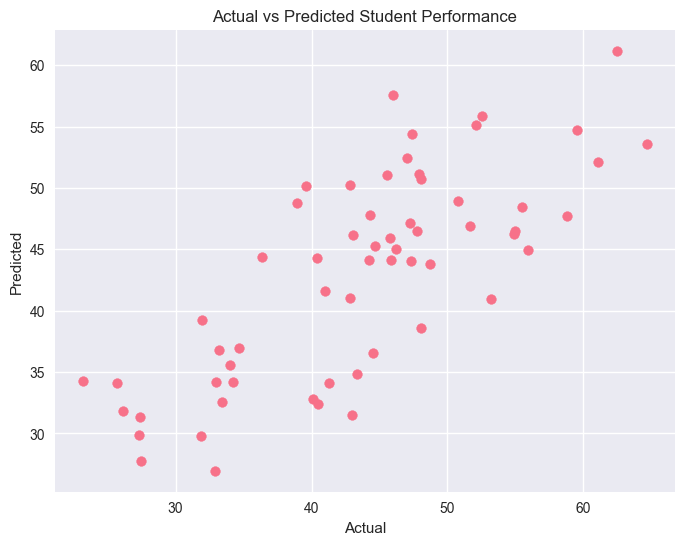

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Student Performance")
plt.show()


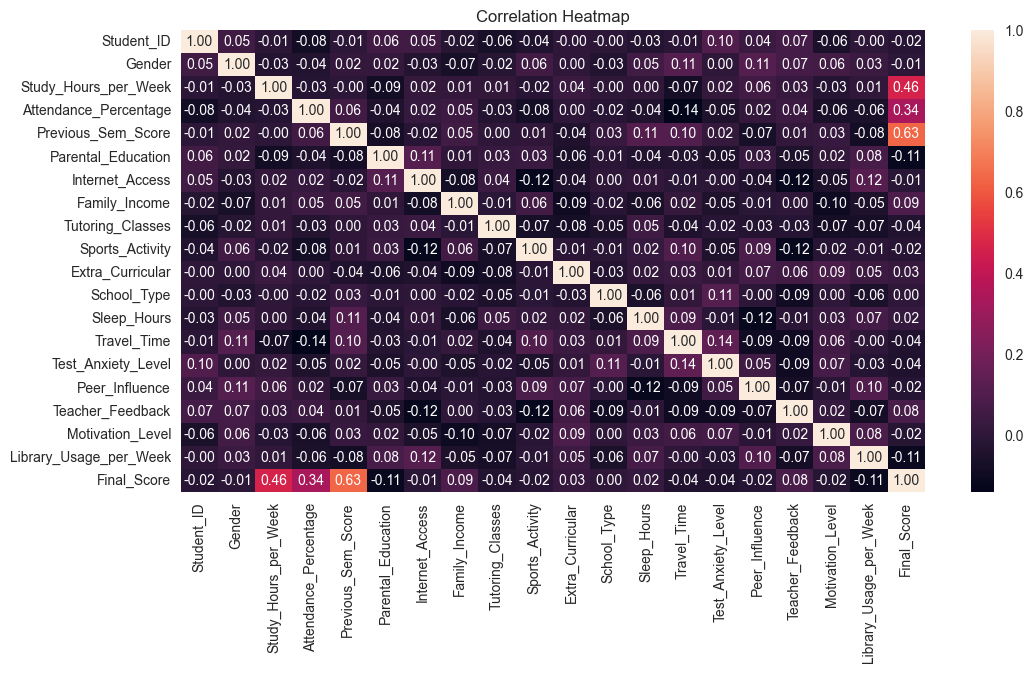

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

importance

,Feature,Coefficient
4,Previous_Sem_Score,6.189313
2,Study_Hours_per_Week,4.703236
3,Attendance_Percentage,2.986436
16,Teacher_Feedback,0.380868
17,Motivation_Level,0.277450
0,Student_ID,0.235031
6,Internet_Access,0.206587
7,Family_Income,0.193244
10,Extra_Curricular,0.098750
5,Parental_Education,0.032018


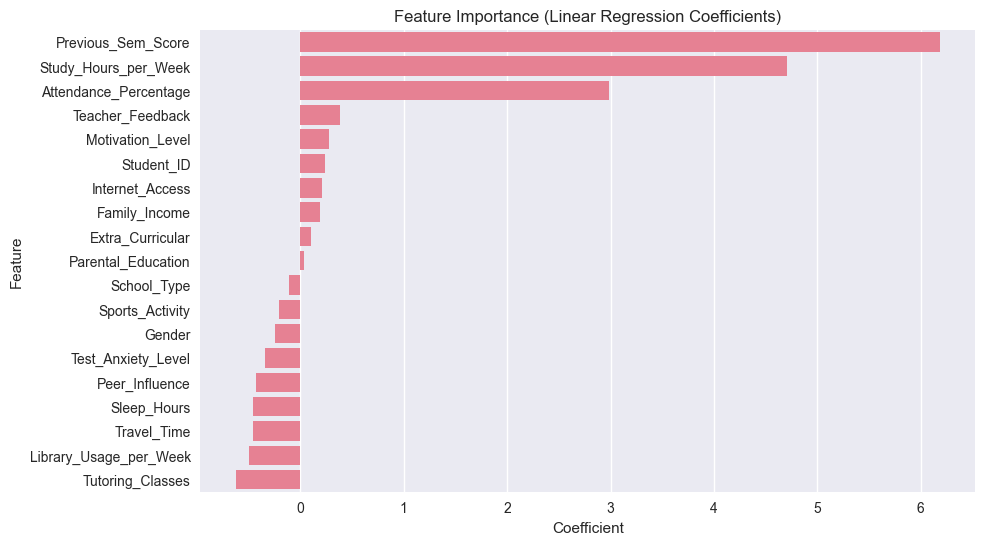

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(data=importance, x="Coefficient", y="Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

In [32]:
new_student = pd.DataFrame({
    col: [X[col].mean()] for col in X.columns     
})

new_student_scaled = scaler.transform(new_student)
predicted_score = model.predict(new_student_scaled)

print("Predicted student score:", predicted_score[0])


Predicted student score: 41.33047296069018


In [33]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results.head()

,Actual,Predicted
203,55.900707,44.906216
266,31.972413,39.210647
152,31.845724,29.818535
9,50.811575,48.934864
233,53.198947,40.963820


In [34]:
results.to_excel("student_predictions.xlsx", index=False)
print("✔ Predictions saved to student_predictions.xlsx")

✔ Predictions saved to student_predictions.xlsx


In [35]:
import pickle

with open("student_performance_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✔ Model saved as student_performance_model.pkl")

✔ Model saved as student_performance_model.pkl


In [36]:
with open("student_performance_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print("Model loaded!")

Model loaded!


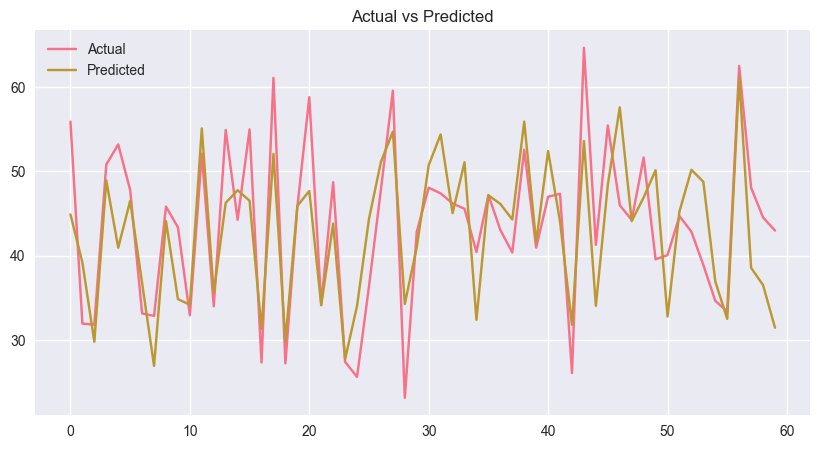

In [37]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

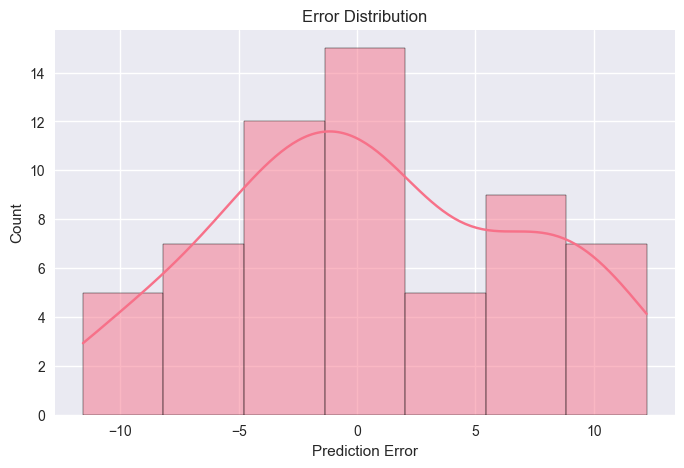

In [38]:
errors = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(errors, kde=True)
plt.title("Error Distribution")
plt.xlabel("Prediction Error")
plt.show()